In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Translation

In [ ]:
M = np.float32([[1,0,25], [0,1,50]])
shifted = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

plt.imshow(shifted)
plt.title("Shifted down & right")
plt.axis("off")
plt.show()

In [ ]:
M = np.float32([[1,0,-50], [0,1,-90]])
shifted = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

plt.imshow(shifted)
plt.title("Shifted up & left")
plt.axis("off")
plt.show()

### Create a function that does this
Typing it every time is time consuming. Lets create a funtion that does this

In [ ]:
def translate(image, x,y):
    M= np.float32([[1,0,x], [0,1,y]])
    shifted = cv2.warpAffine(image,M, (image.shape[1], image.shape[0]))
    return shifted

In [ ]:
shifted = translate(img,0,100)
plt.imshow(shifted)
plt.title("Shifted Down")
plt.axis("off")
plt.show()

### Rotation

In [ ]:
(h,w) = img.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, 45,1.0)
rotated= cv2.warpAffine(img,M, (w,h))

plt.imshow(rotated)
plt.title("Rotated by 45 Degrees")
plt.axis("off")
plt.show()


In [ ]:
(h,w) = img.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90,1.0)
rotated= cv2.warpAffine(img,M, (w,h))

plt.imshow(rotated)
plt.title("Rotated by -90 Degrees")
plt.axis("off")
plt.show()

### Create a function that does this
Typing it every time is time consuming. Lets create a funtion that does this

In [ ]:
def rotate(image, angle, center = None, scale = 1.0):
    (h,w) = image.shape[:2]
    
    if center is None:
        center = (w//2, h//2)
        
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w,h))
    return rotated

In [ ]:
(h,w) = img.shape[:2]
center = (w//2, h//2)

rotated = rotate(img, 180)

plt.imshow(rotated)
plt.title("Rotated by 180 Degrees")
plt.axis("off")
plt.show()

### Resizing

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r = 150.0 / img.shape[1]
dim = (150, int(img.shape[0] * r))

resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img)
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(resize)
plt.title('Resize(Width)'),plt.axis("off")
plt.show()

In [ ]:
r = 50.0 / img.shape[0]
dim = (int(img.shape[1] *4), 50)

resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img)
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(resize)
plt.title('Resize(height)'),plt.axis("off")
plt.show()


### Flipping

In [ ]:

img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipped_H = cv2.flip(img,1)
plt.imshow(flipped)
plt.title("Flipped Horizontally")
plt.axis("off")
plt.show()

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipped_V = cv2.flip(img,0)
plt.imshow(flipped)
plt.title("Flipped Vertically")
plt.axis("off")
plt.show()

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipped_HV = cv2.flip(img,-1)
plt.imshow(flipped)
plt.title("Flipped Horizintally & Vertically")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(2,2,2), plt.imshow(flipped_H,cmap='gray')
plt.title('Horizontally'),plt.axis("off")

plt.subplot(2,2,3), plt.imshow(flipped_V,cmap='gray')
plt.title('Vertically'),plt.axis("off")

plt.subplot(2,2,4), plt.imshow(flipped_HV,cmap='gray')
plt.title('Horizontally& Vertically'),plt.axis("off")
plt.show()

### Cropping

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cropped = img[30:120, 240:335]



plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(cropped,cmap='gray')
plt.title('T-Rex Face'),plt.axis("off")
plt.show()


### Image Arithmetic

In [ ]:

print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])) )
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

In [ ]:
img = cv2.imread('images/trex.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

M = np.ones(img.shape, dtype='uint8') * 100
added = cv2.add(img,M)

M = np.ones(img.shape, dtype='uint8') * 50
subtracted = cv2.subtract(img, M)


plt.figure(figsize=(20,10))

plt.subplot(1,3,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(added,cmap='gray')
plt.title('Added'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(subtracted,cmap='gray')
plt.title('Substracted'),plt.axis("off")
plt.show()

### Bitwize Operations

In [ ]:
rectangle = np.zeros((300,300), dtype='uint8')
cv2.rectangle(rectangle, (25,25), (275,275), 255, -1)

circle = np.zeros((300,300), dtype='uint8')
cv2.circle(circle, (150,150), 150, 255,-1)


plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(rectangle,cmap='gray')
plt.title('Rectangle'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(circle,cmap='gray')
plt.title('Circle'),plt.axis("off")
plt.show()


In [ ]:
bitwizeAND = cv2.bitwise_and(rectangle,circle)

bitwizeOR = cv2.bitwise_or(rectangle, circle)

bitwiseXOR = cv2.bitwise_xor(rectangle,circle)

bitwizeNOT = cv2.bitwise_not(circle)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1), plt.imshow(bitwizeAND,cmap='gray')
plt.title('AND'),plt.axis("off")

plt.subplot(2,2,2), plt.imshow(bitwizeOR,cmap='gray')
plt.title('OR'),plt.axis("off")

plt.subplot(2,2,3), plt.imshow(bitwiseXOR,cmap='gray')
plt.title('XOR'),plt.axis("off")

plt.subplot(2,2,4), plt.imshow(bitwizeNOT,cmap='gray')
plt.title('NOT'),plt.axis("off")
plt.show()

### Masking

In [ ]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


mask = np.zeros(img.shape[:2], dtype='uint8')
(cX,cY) = (img.shape[1]//2, img.shape[0]//2)

cv2.rectangle(mask, (cX-75, cY - 75), (cX + 75, cY+75), 255, -1)

masked = cv2.bitwise_and(img, img, mask = mask)


plt.figure(figsize=(20,10))

plt.subplot(1,3,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(mask,cmap='gray')
plt.title('Mask'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(masked,cmap='gray')
plt.title('Mask applied to Image'),plt.axis("off")

plt.show()


### Splitting and merging channels

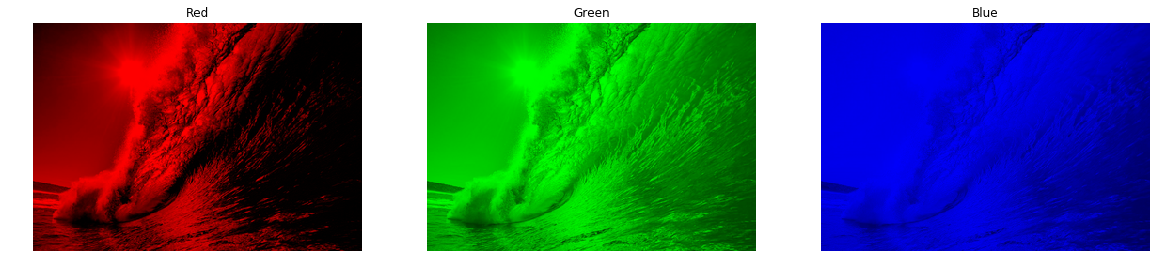

In [22]:
img = cv2.imread('images/wave.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


(R,G,B) = cv2.split(img)
merged = cv2.merge([R, G, B])


# only show each color in image
zeros = np.zeros(img.shape[:2], dtype='uint8')
blue = cv2.merge([zeros,zeros,B])
green = cv2.merge([zeros,G,zeros])
red = cv2.merge([R,zeros,zeros])

plt.figure(figsize=(20,10))

plt.subplot(1,3,1), plt.imshow(red)
plt.title('Red'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(green)
plt.title('Green'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(blue)
plt.title('Blue'),plt.axis("off")

plt.show()


### Color Space

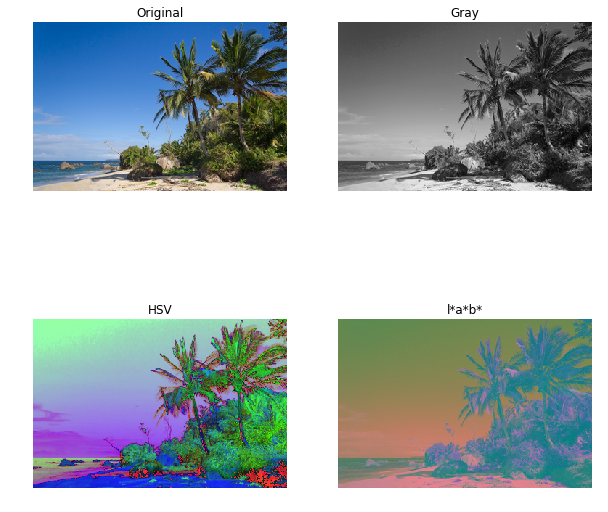

In [44]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV_FULL)

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)






plt.figure(figsize=(10,10))

plt.subplot(2,2,1), plt.imshow(img)
plt.title('Original'),plt.axis("off")

plt.subplot(2,2,2), plt.imshow(gray, cmap='gray')
plt.title('Gray'),plt.axis("off")

plt.subplot(2,2,3), plt.imshow(hsv,cmap='hsv')
plt.title('HSV'),plt.axis("off")

plt.subplot(2,2,4), plt.imshow(lab)
plt.title('l*a*b*'),plt.axis("off")
plt.show()

